# DermaLens:- Skin Disease Diagnosis using Machine Learning

## Importing Dataset

In [1]:
import os
import pandas as pd

# Define the root directory of your training dataset
root_dir = "/kaggle/input/dermnet/train"

# Supported image file extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Traverse the directory
for subdir, _, files in os.walk(root_dir):
    for file in files:
        # Check if the file is an image
        if any(file.lower().endswith(ext) for ext in image_extensions):
            # Get the full path of the image
            image_path = os.path.join(subdir, file)

            # Get the label(folder name)
            label = os.path.basename(subdir)
            #append to lists
            image_paths.append(image_path)
            labels.append(label)

#Create a dataframe
df = pd.DataFrame({'Image_Path': image_paths, 'Disease': labels})
df

,Image_Path,Disease
0,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
1,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
2,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
3,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
4,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
...,...,...
15552,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15553,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15554,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15555,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections


## Looking at an image

Light Diseases and Disorders of Pigmentation
Image Size:(720, 480)


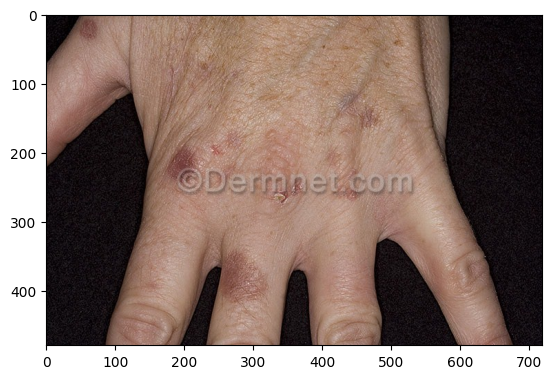

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def First_Image_Path():
    first_image_path = df['Image_Path'].iloc[100]
    print(df['Disease'].iloc[100])
    image = Image.open(first_image_path)
    print(f"Image Size:{image.size}")
    plt.imshow(image)
    plt.show()

First_Image_Path()

## Removing Corrupt Images:-

In [3]:

from PIL import Image

def is_valid_image(Image_Path):
    try:
        img = Image.open(Image_Path)
        img.verify()
        return True
        
    except(IOError, SyntaxError):
        return False

df = df[df['Image_Path'].apply(is_valid_image)]
df

,Image_Path,Disease
0,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
1,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
2,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
3,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
4,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
...,...,...
15552,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15553,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15554,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15555,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections


## Removing Duplicate Images:-

In [4]:
from imagehash import average_hash

def compute_hash(Image_Path):
    img = Image.open(Image_Path)
    return average_hash(img)

df['image_hash'] = df['Image_Path'].apply(compute_hash)
df = df.drop_duplicates(subset=['image_hash'])
df = df.drop(columns=['image_hash'])
df

,Image_Path,Disease
0,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
1,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
2,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
3,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
4,/kaggle/input/dermnet/train/Light Diseases and...,Light Diseases and Disorders of Pigmentation
...,...,...
15551,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15552,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15553,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections
15554,/kaggle/input/dermnet/train/Warts Molluscum an...,Warts Molluscum and other Viral Infections


## Looking at the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14599 entries, 0 to 15556
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  14599 non-null  object
 1   Disease     14599 non-null  object
dtypes: object(2)
memory usage: 342.2+ KB


In [6]:
print(df.head())
print(df["Disease"].value_counts())

                                          Image_Path  \
0  /kaggle/input/dermnet/train/Light Diseases and...   
1  /kaggle/input/dermnet/train/Light Diseases and...   
2  /kaggle/input/dermnet/train/Light Diseases and...   
3  /kaggle/input/dermnet/train/Light Diseases and...   
4  /kaggle/input/dermnet/train/Light Diseases and...   

                                        Disease  
0  Light Diseases and Disorders of Pigmentation  
1  Light Diseases and Disorders of Pigmentation  
2  Light Diseases and Disorders of Pigmentation  
3  Light Diseases and Disorders of Pigmentation  
4  Light Diseases and Disorders of Pigmentation  
Disease
Psoriasis pictures Lichen Planus and related diseases                 1352
Seborrheic Keratoses and other Benign Tumors                          1317
Tinea Ringworm Candidiasis and other Fungal Infections                1246
Eczema Photos                                                         1119
Actinic Keratosis Basal Cell Carcinoma and other Malign

## Preprocessing images

In [7]:
import tensorflow as tf

IMG_SIZE = 299  # InceptionV3 expects 299x299
BATCH_SIZE = 32

def preprocess_train(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = data_augmentation(image)
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

def preprocess_val(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

2025-04-27 20:50:37.809689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745787037.995145      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745787038.048673      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Analysing class distribution

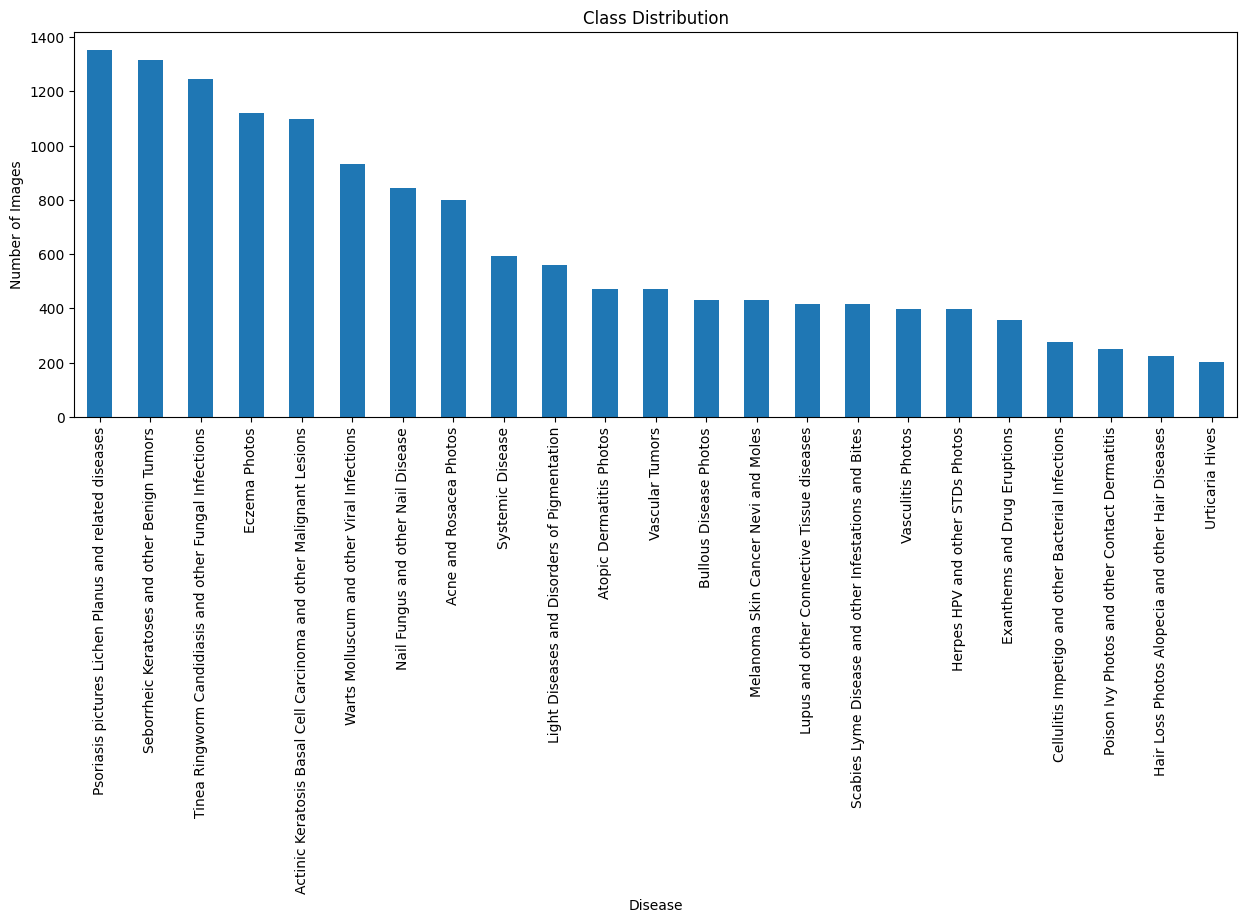

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
df['Disease'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.show()


## Encoding labels for processing

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['Disease'])


## Handling Class Imbalance

In [10]:
#from sklearn.utils import class_weight
import numpy as np

# Get all labels
labels = df['label_encoded']

"""# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Convert into dictionary
class_weights = dict(enumerate(class_weights))

print(class_weights)
"""
from sklearn.utils import resample
import pandas as pd

# Assuming your dataframe is called 'df' with 'Image_Path' and 'Disease'
dfs = []
target_samples = df['Disease'].value_counts().max()  # Match the largest class

for label in df['Disease'].unique():
    df_label = df[df['Disease'] == label]
    df_label_upsampled = resample(
        df_label,
        replace=True,
        n_samples=target_samples,
        random_state=42
    )
    dfs.append(df_label_upsampled)

# Combine and shuffle
df = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

print(df['Disease'].value_counts())

Disease
Tinea Ringworm Candidiasis and other Fungal Infections                1352
Seborrheic Keratoses and other Benign Tumors                          1352
Acne and Rosacea Photos                                               1352
Systemic Disease                                                      1352
Vascular Tumors                                                       1352
Nail Fungus and other Nail Disease                                    1352
Bullous Disease Photos                                                1352
Light Diseases and Disorders of Pigmentation                          1352
Poison Ivy Photos and other Contact Dermatitis                        1352
Urticaria Hives                                                       1352
Hair Loss Photos Alopecia and other Hair Diseases                     1352
Eczema Photos                                                         1352
Warts Molluscum and other Viral Infections                            1352
Lupus and other C

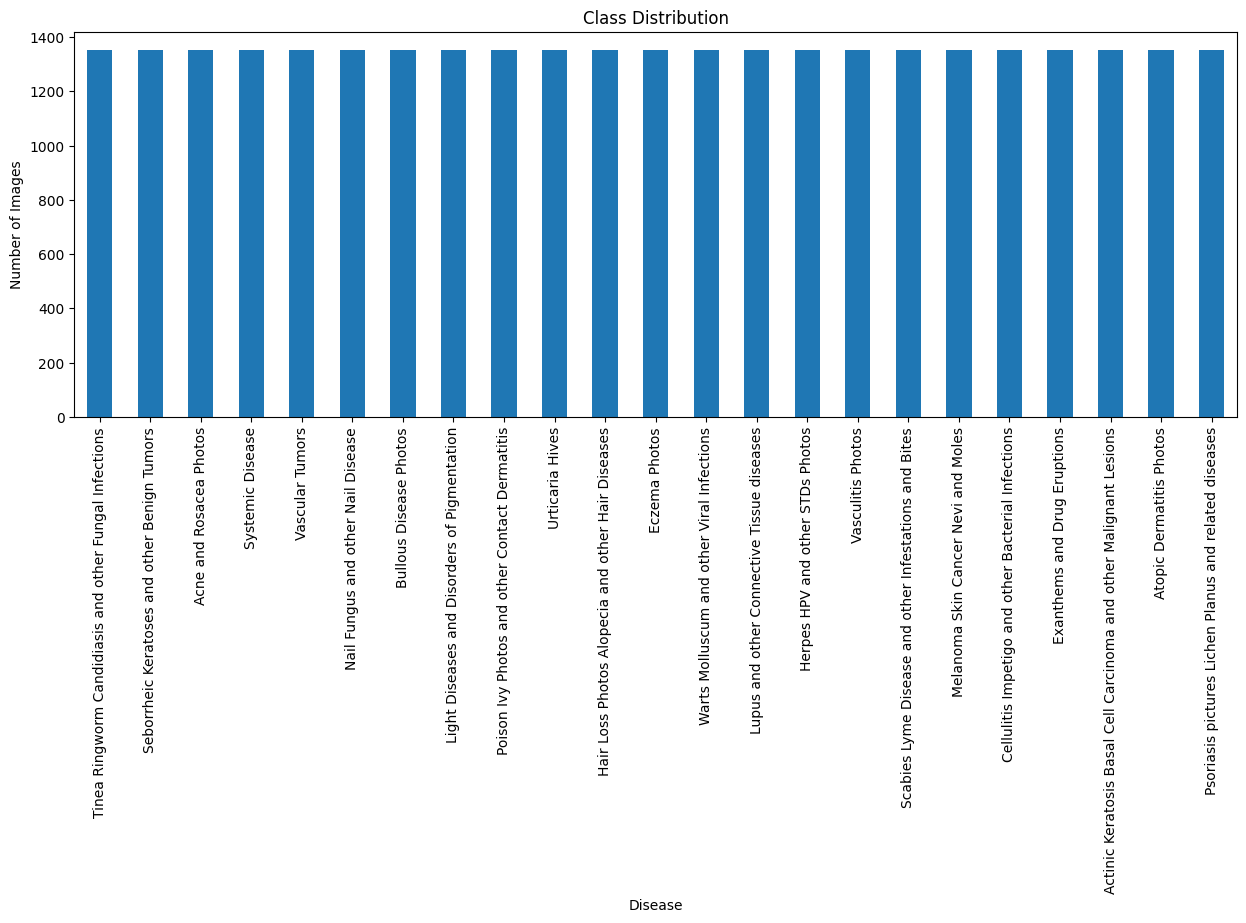

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
df['Disease'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.show()


## Splitting the datasets:

In [12]:
from sklearn.model_selection import train_test_split

# Split dataset
train_paths, val_paths, train_labels, val_labels = train_test_split(
    df['Image_Path'],
    df['label_encoded'],
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)




## Data Augmentation

In [13]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.2),
])


I0000 00:00:1745787051.317891      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


## Creating Tensorflow Datasets

In [14]:
# Tensorflow Datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_paths.values, tf.one_hot(train_labels.values, depth=23)))
val_ds = tf.data.Dataset.from_tensor_slices((val_paths.values, tf.one_hot(val_labels.values, depth=23)))

# Map preprocessing
train_ds = train_ds.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_val, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle, Batch, Prefetch
train_ds = train_ds.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


## Model Building

### **InceptionV3**

In [15]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load pretrained InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze initially

# Create Model
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)  # Important: training=False for frozen model
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(23, activation='softmax')(x)  # 23 classes

model = models.Model(inputs, outputs)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Compiling the model

In [16]:
from tensorflow.keras.losses import CategoricalCrossentropy

loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=['accuracy']
)


## Setting Up Callbacks

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Watch validation loss
    factor=0.5,                # Reduce LR by a factor of 0.5
    patience=3,                # After 3 epochs of no improvement
    min_lr=1e-7,               # Lower bound for LR
    verbose=1
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)


## Training the model

In [18]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, model_checkpoint,reduce_lr]
)

Epoch 1/20


I0000 00:00:1745787076.733530      60 service.cc:148] XLA service 0x7be2f8003770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745787076.736387      60 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745787078.623065      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/778 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.0625 - loss: 3.4643   

I0000 00:00:1745787086.416149      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


778/778 ━━━━━━━━━━━━━━━━━━━━ 317s 368ms/step - accuracy: 0.1665 - loss: 3.0571 - val_accuracy: 0.3023 - val_loss: 2.5321 - learning_rate: 0.0010
Epoch 2/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 280s 348ms/step - accuracy: 0.2761 - loss: 2.6764 - val_accuracy: 0.3314 - val_loss: 2.4531 - learning_rate: 0.0010
Epoch 3/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 280s 348ms/step - accuracy: 0.2831 - loss: 2.6470 - val_accuracy: 0.3360 - val_loss: 2.4465 - learning_rate: 0.0010
Epoch 4/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 274s 339ms/step - accuracy: 0.3029 - loss: 2.6009 - val_accuracy: 0.3317 - val_loss: 2.4198 - learning_rate: 0.0010
Epoch 5/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 273s 339ms/step - accuracy: 0.3055 - loss: 2.5962 - val_accuracy: 0.3476 - val_loss: 2.4098 - learning_rate: 0.0010
Epoch 6/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 281s 349ms/step - accuracy: 0.3066 - loss: 2.5871 - val_accuracy: 0.3508 - val_loss: 2.3836 - learning_rate: 0.0010
Epoch 7/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 274s 340ms/step - accuracy: 0.3051 

## Evalutaing after first training

195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.3918 - loss: 2.3023
Validation Loss: 2.3007
Validation Accuracy: 0.3921
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.37      0.61      0.46       270
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.30      0.40      0.34       270
                                          Atopic Dermatitis Photos       0.31      0.43      0.36       270
                                            Bullous Disease Photos       0.33      0.33      0.33       270
                Cellulitis Impetigo and other Bacterial Infections       0.23      0.18      0.20       271
                                                     Eczema Photos       0.35      0.30      0.32       270
                                      Exanthems and Drug Eruptions     

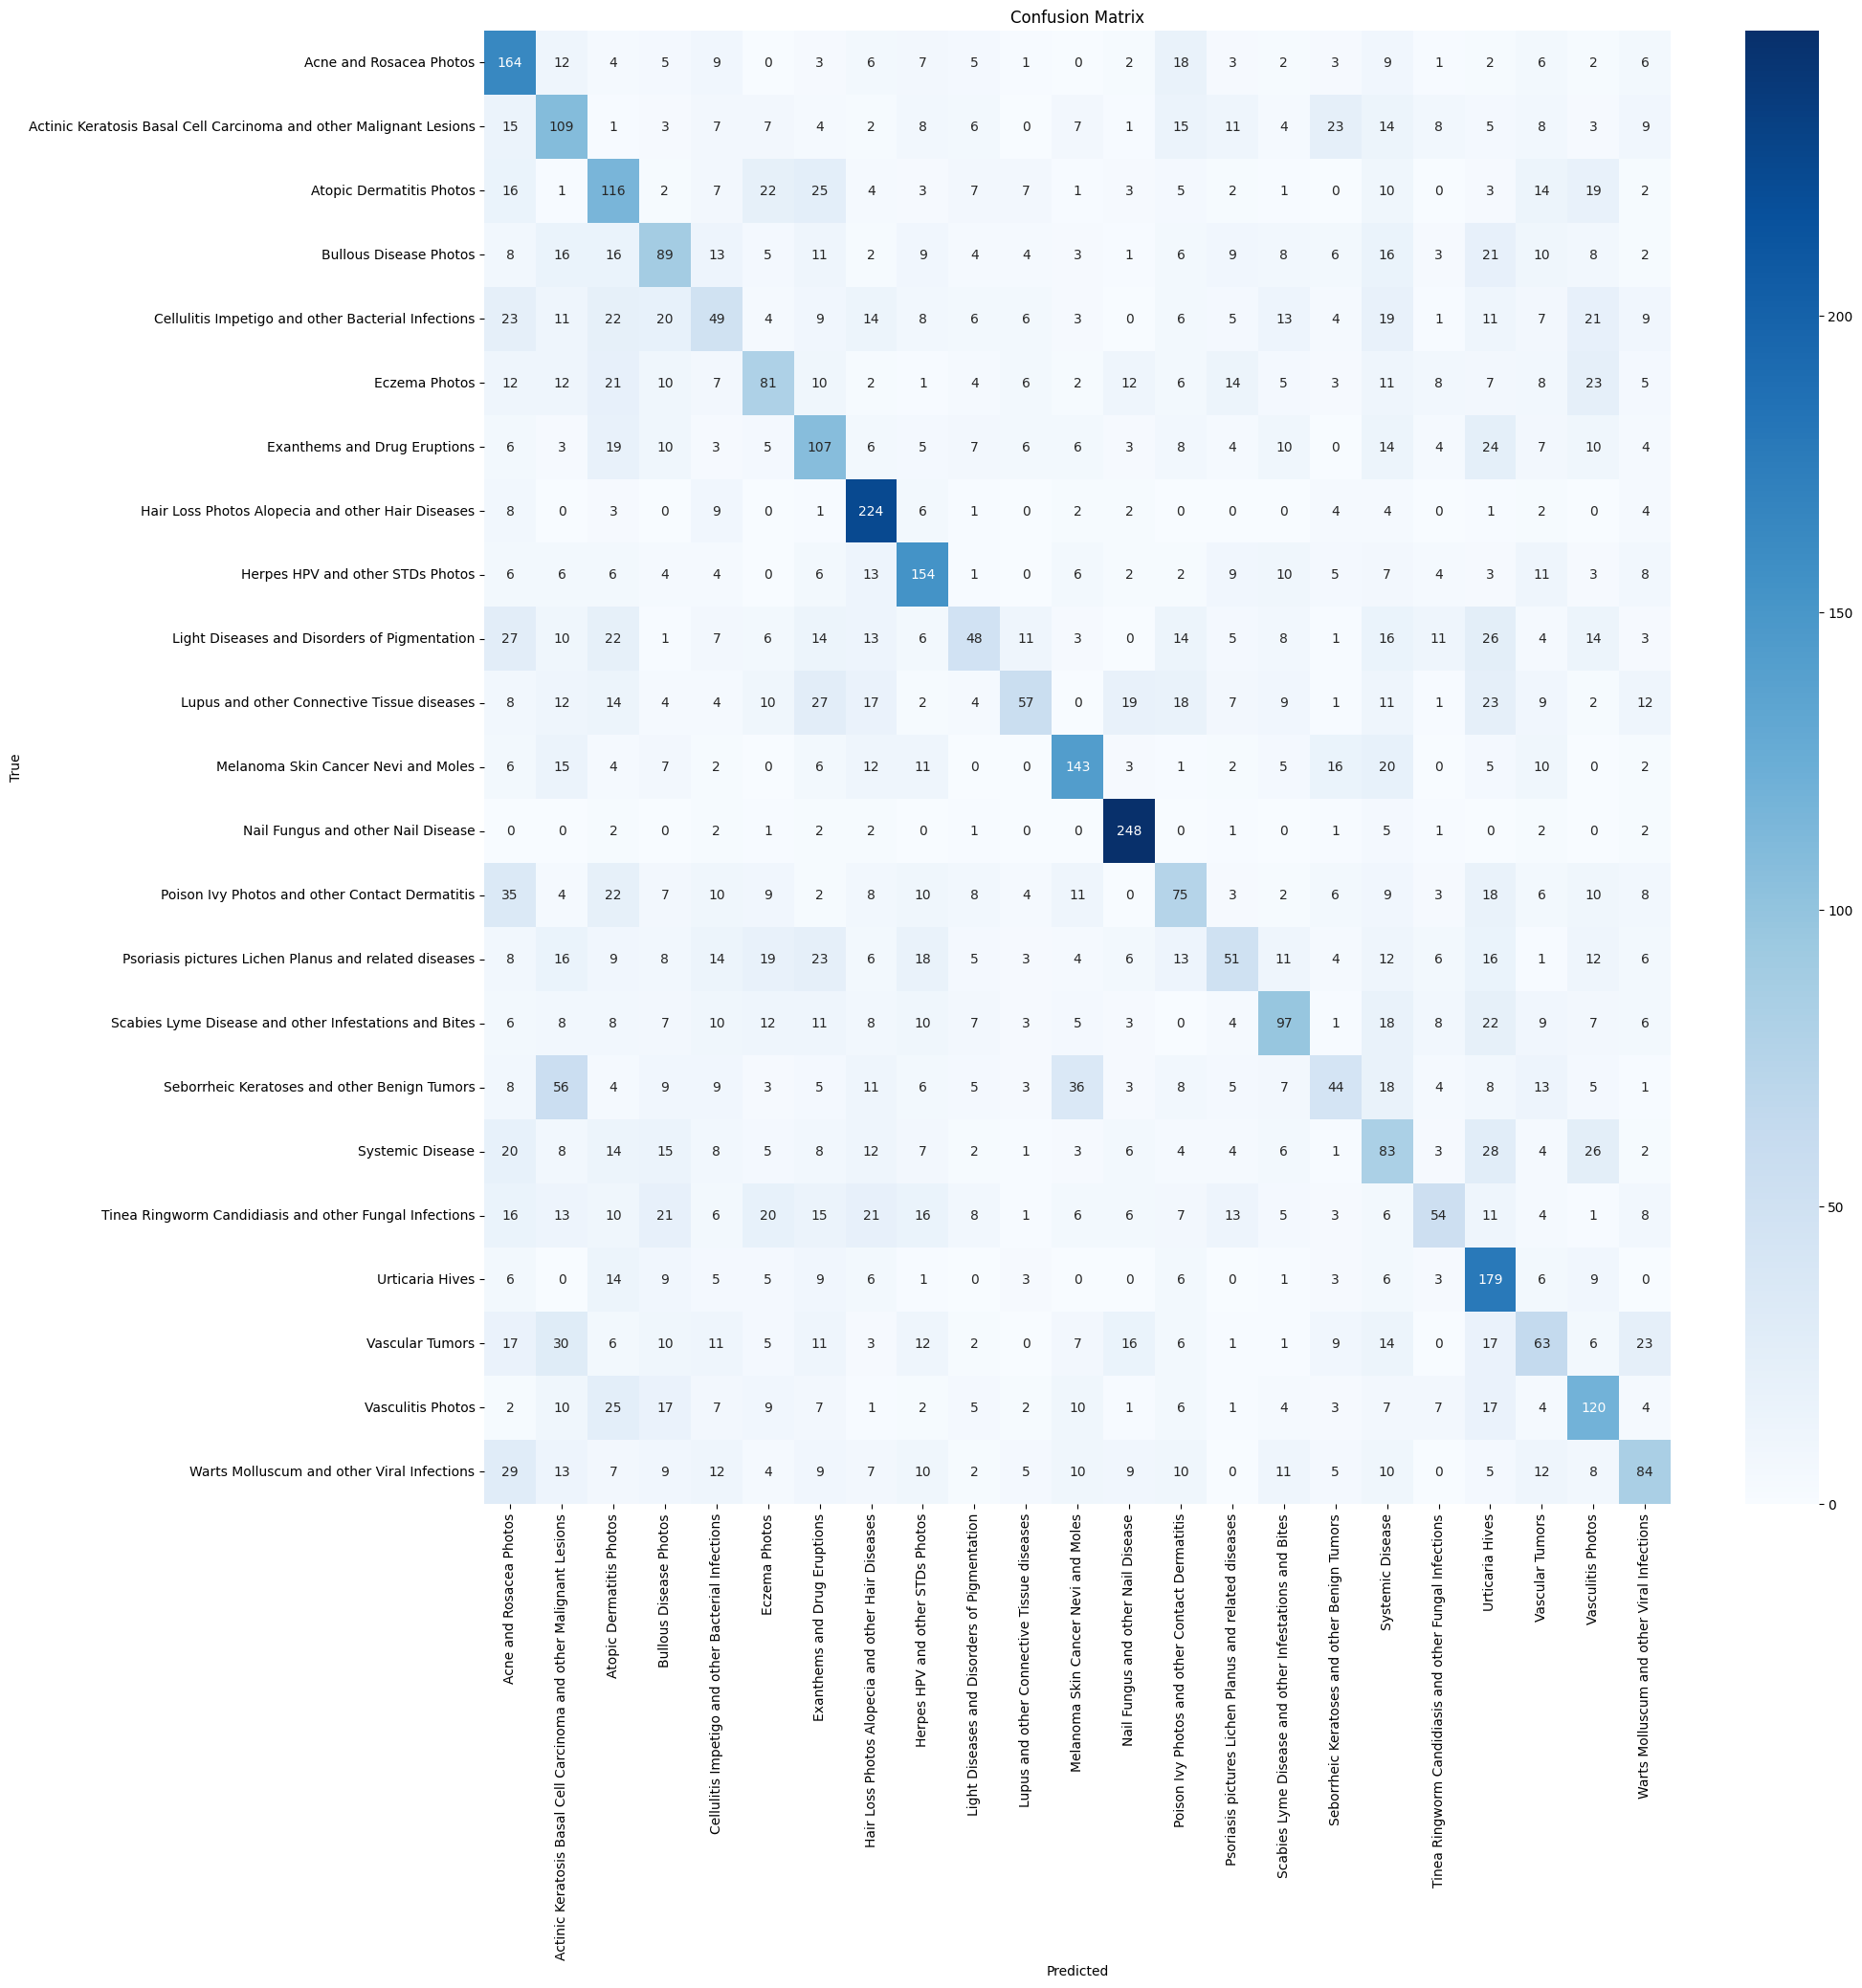

In [19]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Predict
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
# Get true labels from one-hot encoded validation set
y_true = []
for images, labels in val_ds.unbatch():
    y_true.append(np.argmax(labels.numpy()))
y_true = np.array(y_true)

# 3. Classification Report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Finetuning the model

In [20]:
# Unfreeze the top layers of InceptionV3
base_model.trainable = True

# Optionally, you can unfreeze only the top N layers:
fine_tune_at = 249  # Example, depending on your GPU/CPU you can adjust
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model again with lower learning rate
from tensorflow.keras.optimizers import Adam

loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss= loss_fn,
    metrics=['accuracy']
)

# Now fine-tune the model
fine_tune_epochs = 20

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 333s 380ms/step - accuracy: 0.2681 - loss: 2.6784 - val_accuracy: 0.3913 - val_loss: 2.2999 - learning_rate: 1.0000e-05
Epoch 2/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 287s 356ms/step - accuracy: 0.3532 - loss: 2.4144 - val_accuracy: 0.4280 - val_loss: 2.1988 - learning_rate: 1.0000e-05
Epoch 3/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 287s 356ms/step - accuracy: 0.3874 - loss: 2.2983 - val_accuracy: 0.4468 - val_loss: 2.1251 - learning_rate: 1.0000e-05
Epoch 4/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 286s 355ms/step - accuracy: 0.4174 - loss: 2.2154 - val_accuracy: 0.4751 - val_loss: 2.0608 - learning_rate: 1.0000e-05
Epoch 5/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 293s 363ms/step - accuracy: 0.4541 - loss: 2.1220 - val_accuracy: 0.4960 - val_loss: 2.0064 - learning_rate: 1.0000e-05
Epoch 6/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 286s 355ms/step - accuracy: 0.4788 - loss: 2.0583 - val_accuracy: 0.5166 - val_loss: 1.9563 - learning_rate: 1.0000e-05
Epoch 7/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 

## Again evaluating after fine tuning

195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.6938 - loss: 1.5134
Validation Loss: 1.5066
Validation Accuracy: 0.6953
195/195 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.69      0.72      0.71       270
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.64      0.47      0.55       270
                                          Atopic Dermatitis Photos       0.68      0.79      0.73       270
                                            Bullous Disease Photos       0.69      0.71      0.70       270
                Cellulitis Impetigo and other Bacterial Infections       0.77      0.74      0.75       271
                                                     Eczema Photos       0.57      0.45      0.50       270
                                      Exanthems and Drug Eruptions     

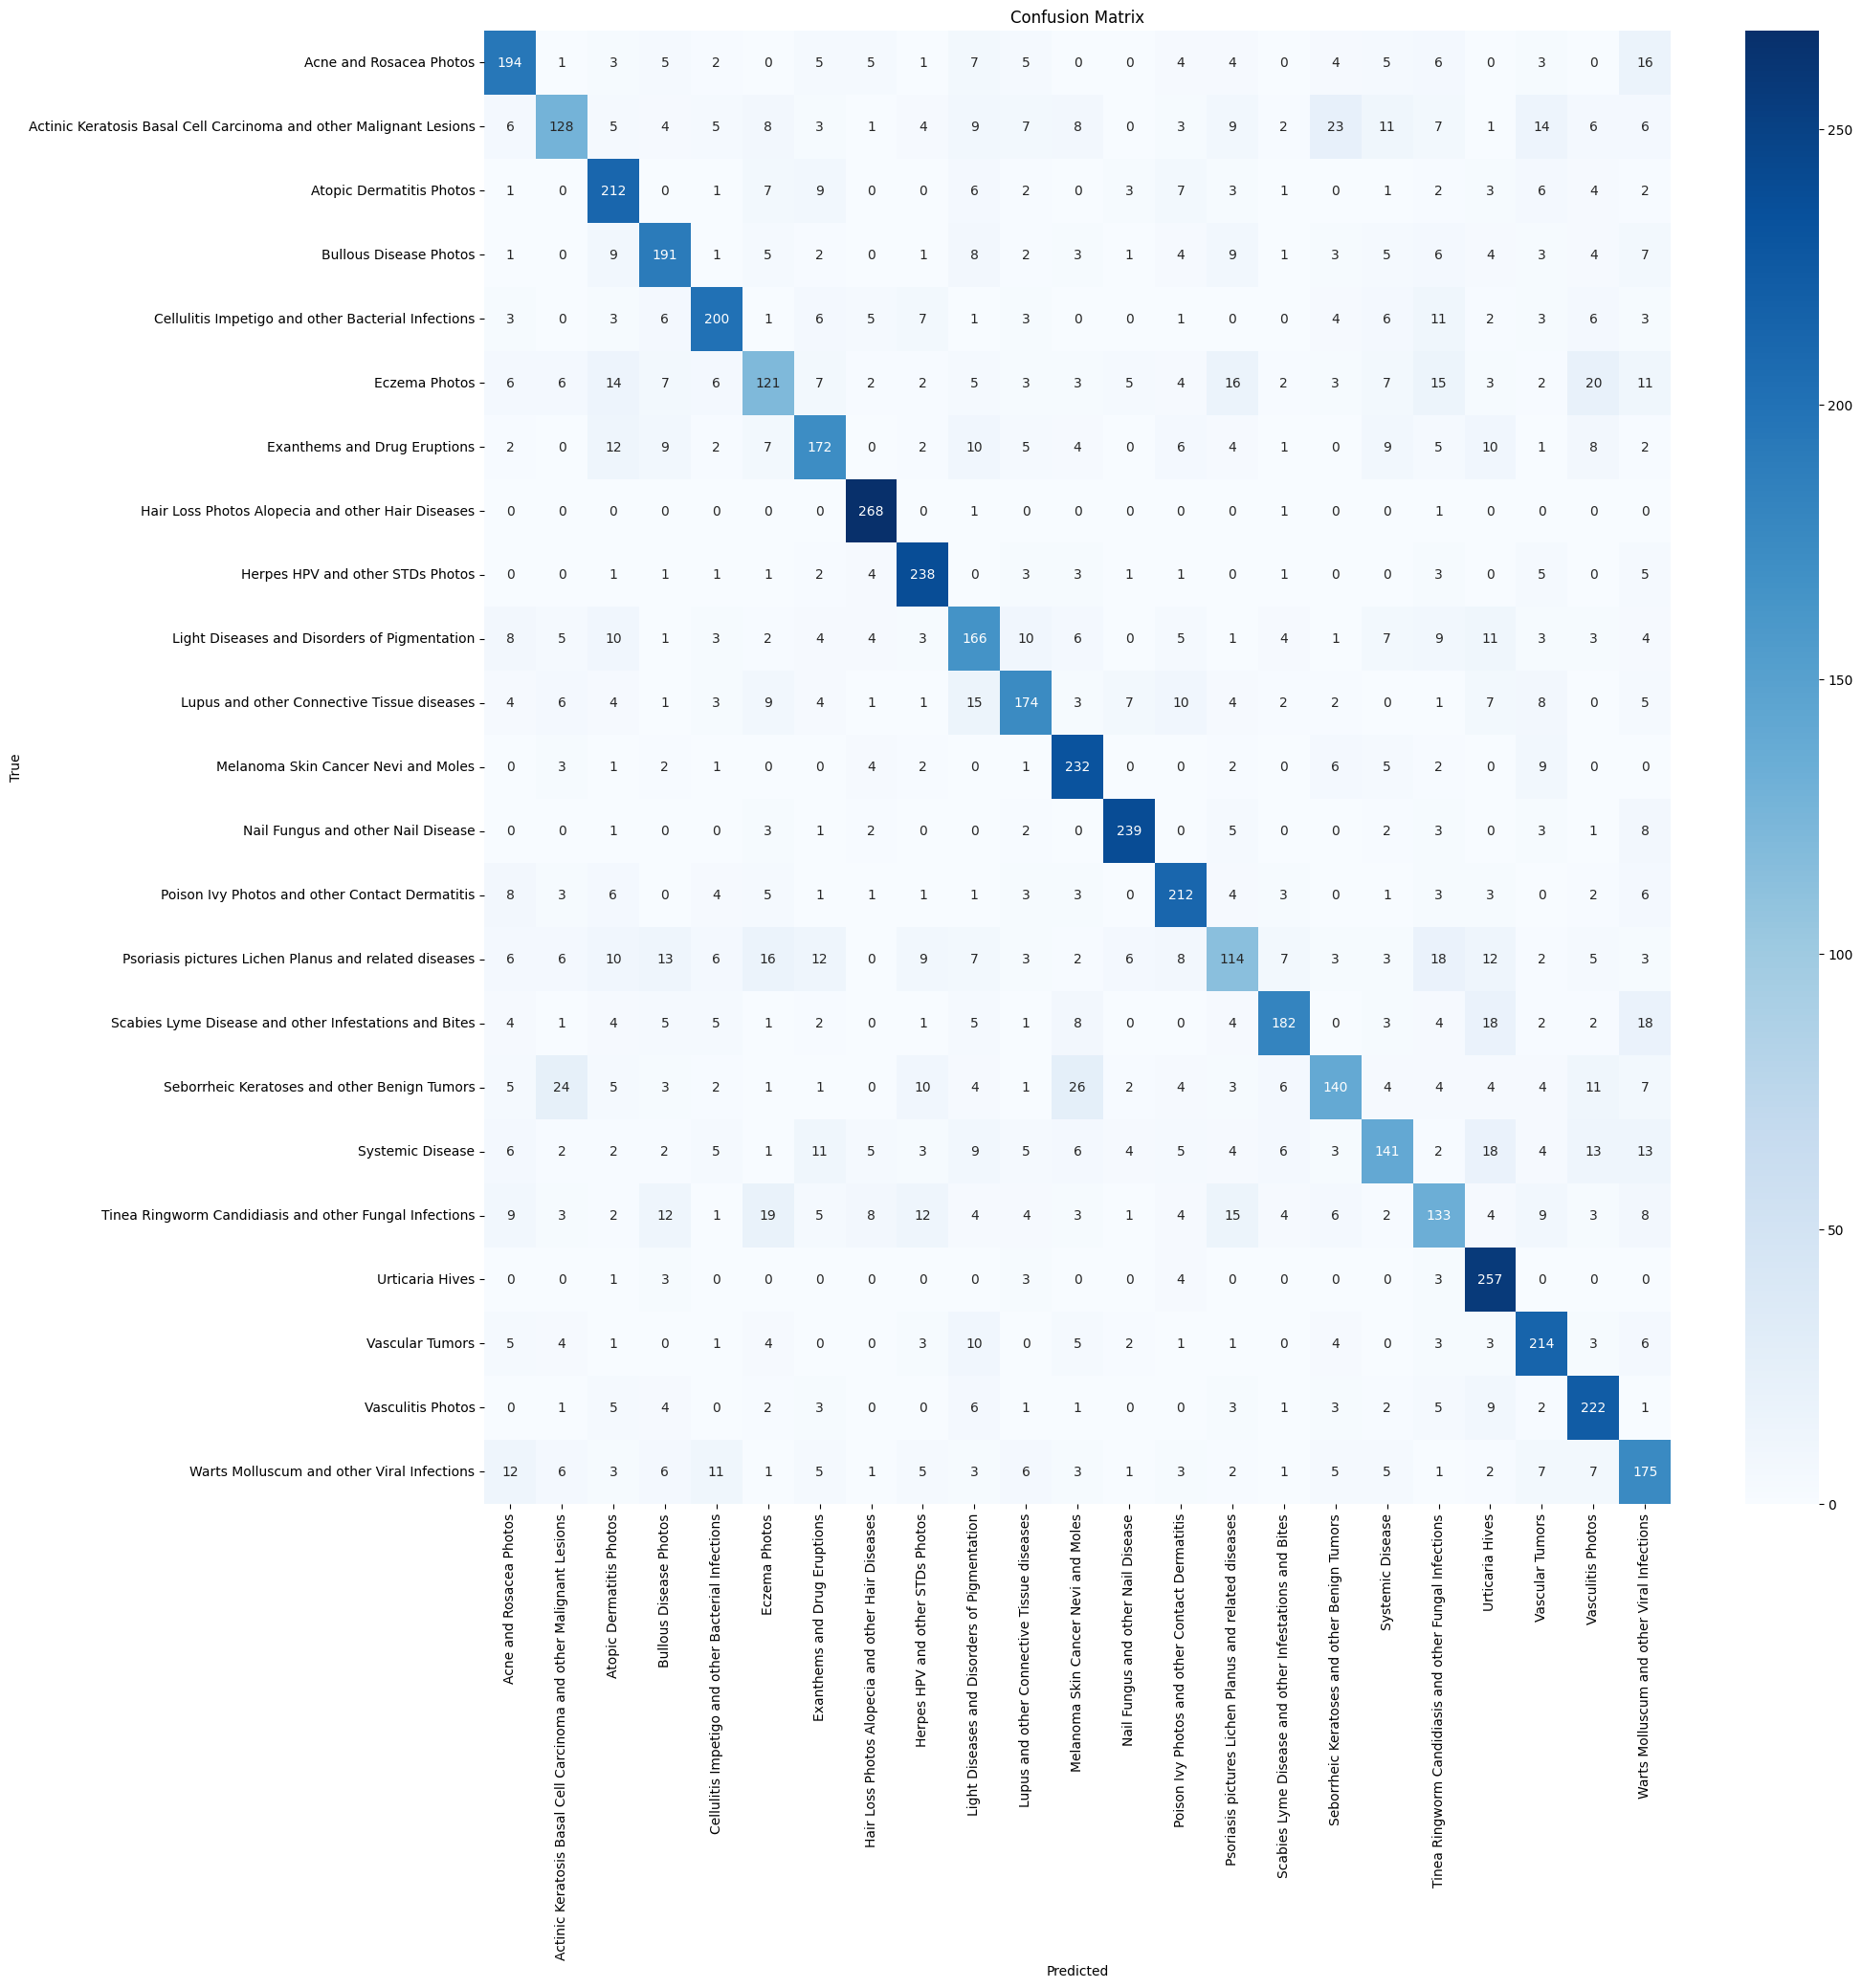

In [21]:
# 1. Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Predict
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
# Get true labels from one-hot encoded validation set
y_true = []
for images, labels in val_ds.unbatch():
    y_true.append(np.argmax(labels.numpy()))
y_true = np.array(y_true)


# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Classification Report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()